## Abdelrahman Osama Radwan

In [1]:
import pandas as pd

### Read Data

In [2]:
data = pd.read_csv('data1.csv')
df = data.copy()
df.shape

(2500, 7)

In [3]:
df.head()

,name,city,salary,education,age,socialtype,year
0,Mohamed Youssef,Assiut,113181.0,Tourism Studies,25,Married,2019
1,Mariam Ali,Shubra El Kheima,NaN,Computer Science and Information Technology,34,Divorced,2019
2,Amir Salem,Alexandria,10996.0,Economics and Political Science,30,Married,2019
3,Mohsen El-Bakry,Suez,NaN,Architecture,40,Divorced,2019
4,Amir Osman,Zagazig,NaN,Education,53,Divorced,2019


In [4]:
df.tail()

,name,city,salary,education,age,socialtype,year
2495,Magdy Ramadan,Alexandria,70199.0,Law,46,Single,2023
2496,Kamal Mahmoudi,Alexandria,11374.0,Civil Aviation,40,Married,2023
2497,Nermine Saad,Alexandria,57022.0,Public Relations and Advertising,21,Widowed,2023
2498,Wafaa El-Gabry,Mansoura,33862.0,Architecture,55,Divorced,2023
2499,Nadia Nour,Aswan,32823.0,Nursing,51,Widowed,2023


### Capitalize column names

In [5]:
df.columns

Index(['name', 'city', 'salary', 'education', 'age', 'socialtype', 'year'], dtype='object')

In [6]:
df.columns = df.columns.str.upper()
df.sample()

,NAME,CITY,SALARY,EDUCATION,AGE,SOCIALTYPE,YEAR
1486,Sherif Ali,Damietta,104195.0,Pharmacy,24,Single,2022


### Rename

In [7]:
df = df.rename(columns={'SOCIALTYPE' : 'MARITAL_STATUS'})
df.sample()

,NAME,CITY,SALARY,EDUCATION,AGE,MARITAL_STATUS,YEAR
1711,Youssef Hassan,Port Said,135733.0,Environmental Agriculture,22,Divorced,2022


### Full analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            2500 non-null   object 
 1   CITY            2463 non-null   object 
 2   SALARY          2286 non-null   float64
 3   EDUCATION       2475 non-null   object 
 4   AGE             2500 non-null   int64  
 5   MARITAL_STATUS  2500 non-null   object 
 6   YEAR            2500 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 136.8+ KB


In [9]:
df.describe()

,SALARY,AGE,YEAR
count,2.286000e+03,2500.000000,2500.000000
mean,9.292273e+04,40.473200,2020.855200
std,4.219795e+05,11.772133,1.212774
min,2.015000e+03,21.000000,2019.000000
25%,3.933125e+04,30.000000,2020.000000
50%,7.598450e+04,41.000000,2021.000000
75%,1.115112e+05,51.000000,2022.000000
max,1.293290e+07,60.000000,2023.000000


In [10]:
df.shape

(2500, 7)

In [11]:
df.isnull().sum()

NAME                0
CITY               37
SALARY            214
EDUCATION          25
AGE                 0
MARITAL_STATUS      0
YEAR                0
dtype: int64

In [12]:
df['SALARY'].value_counts().nlargest(3)

SALARY
68595.0    2
46667.0    2
93984.0    2
Name: count, dtype: int64

In [13]:
df['AGE'].value_counts().nlargest(3)


AGE
28    88
55    82
50    73
Name: count, dtype: int64

In [14]:
df[['SALARY','AGE']].corr()

,SALARY,AGE
SALARY,1.000000,-0.024457
AGE,-0.024457,1.000000


In [15]:
df.sample()

,NAME,CITY,SALARY,EDUCATION,AGE,MARITAL_STATUS,YEAR
2021,Mariam Ibrahim,Beni Suef,101473.0,Civil Aviation,59,Married,2022


## Convert all columns to suitable types & Fixing null values

In [16]:
column_types = {'AGE' : 'int',
                'MARITAL_STATUS' : 'category',
                'EDUCATION':'category',
                'NAME' : 'str',
                'CITY' : 'category',
                'SALARY' : 'float',
                'YEAR' : 'int'}
df.astype(column_types)

,NAME,CITY,SALARY,EDUCATION,AGE,MARITAL_STATUS,YEAR
0,Mohamed Youssef,Assiut,113181.0,Tourism Studies,25,Married,2019
1,Mariam Ali,Shubra El Kheima,NaN,Computer Science and Information Technology,34,Divorced,2019
2,Amir Salem,Alexandria,10996.0,Economics and Political Science,30,Married,2019
3,Mohsen El-Bakry,Suez,NaN,Architecture,40,Divorced,2019
4,Amir Osman,Zagazig,NaN,Education,53,Divorced,2019
...,...,...,...,...,...,...,...
2495,Magdy Ramadan,Alexandria,70199.0,Law,46,Single,2023
2496,Kamal Mahmoudi,Alexandria,11374.0,Civil Aviation,40,Married,2023
2497,Nermine Saad,Alexandria,57022.0,Public Relations and Advertising,21,Widowed,2023
2498,Wafaa El-Gabry,Mansoura,33862.0,Architecture,55,Divorced,2023


In [17]:
df = df.fillna(value={'SALARY': df['SALARY'].mean()})
# df = df.fillna()
df.isnull().sum()

NAME               0
CITY              37
SALARY             0
EDUCATION         25
AGE                0
MARITAL_STATUS     0
YEAR               0
dtype: int64

In [18]:
df.sample()

,NAME,CITY,SALARY,EDUCATION,AGE,MARITAL_STATUS,YEAR
894,Hassan Nour,Minya,39664.0,Tourism Studies,32,Single,2020


In [19]:

df.isnull().sum()

NAME               0
CITY              37
SALARY             0
EDUCATION         25
AGE                0
MARITAL_STATUS     0
YEAR               0
dtype: int64

In [20]:
df = df.dropna()
df.isnull().sum()

NAME              0
CITY              0
SALARY            0
EDUCATION         0
AGE               0
MARITAL_STATUS    0
YEAR              0
dtype: int64

### How many average salaries by year

In [21]:
avg_salary_per_year = df.groupby('YEAR')['SALARY'].mean()
avg_salary_per_year

YEAR
2019    158762.244180
2020     77721.883097
2021     76354.662890
2022     77100.543119
2023     59976.384615
Name: SALARY, dtype: float64

In [22]:
avg_salary_per_city = df.groupby('CITY')['SALARY'].mean()
avg_salary_per_city

CITY
Alexandria           77591.942349
Assiut               70028.243867
Aswan               186620.122544
Asyut                74682.370223
Beni Suef            75105.584284
Cairo                77717.171108
Damietta             77912.288027
Giza                 83052.056698
Ismailia             87553.369637
Kafr El Sheikh       78532.916581
Luxor               134270.900543
Mansoura             90636.376873
Minya               115943.719160
Port Said            72654.200763
Qena                 73616.258185
Shubra El Kheima     76746.628066
Sohag                82021.790525
Suez                178123.190810
Tanta                80059.466459
Zagazig              78595.164186
Name: SALARY, dtype: float64

### The most education

In [23]:
df['EDUCATION'].mode()

0    Public Relations and Advertising
Name: EDUCATION, dtype: object

In [24]:
df.to_csv('data1_final.csv')

## Bonus Part

In [25]:
d1 = {'YEAR':2019, 'GDP':1.2}
d2 = {'YEAR':2020, 'GDP':2.1}
d3 = {'YEAR':2021, 'GDP':3}
d4 = {'YEAR':2022, 'GDP':2.5}
d5 = {'YEAR':2023, 'GDP':4}

df2 = pd.DataFrame([d1, d2, d3, d4, d5])
df2

,YEAR,GDP
0,2019,1.2
1,2020,2.1
2,2021,3.0
3,2022,2.5
4,2023,4.0


In [26]:
NewData = pd.merge(df, df2, how='left')
NewData.sample(9)

,NAME,CITY,SALARY,EDUCATION,AGE,MARITAL_STATUS,YEAR,GDP
1491,Amir Mahmoud,Cairo,121775.000000,Applied Sciences,27,Married,2022,2.5
219,Marwa El-Khouly,Zagazig,21833.000000,Pharmacy,22,Widowed,2019,1.2
584,Hoda Ezzat,Ismailia,92922.731409,Tourism Studies,35,Divorced,2020,2.1
1522,Ashraf Fawzy,Tanta,38963.000000,Architecture,33,Divorced,2022,2.5
2332,Mohamed Abdelhak,Qena,6839.000000,Nursing,34,Widowed,2022,2.5
460,Emad El-Khouly,Giza,41417.000000,Agriculture,29,Married,2019,1.2
1272,Sara Abdullah,Port Said,66252.000000,Tourism Studies,59,Widowed,2021,3.0
2406,Wafaa Ramadan,Beni Suef,82734.000000,Education,58,Widowed,2022,2.5
2090,Omar Ahmed,Assiut,46789.000000,Commerce,41,Single,2022,2.5


# Visualization

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns

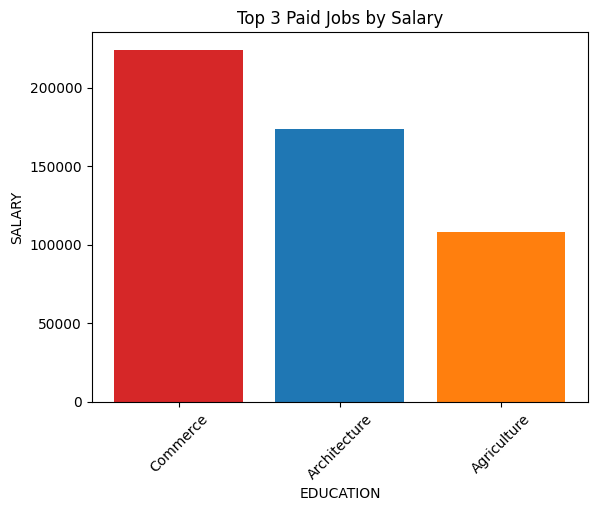

In [28]:
top_paid_jobs = df.groupby('EDUCATION')['SALARY'].mean().nlargest(3) 

bar_labels = ['red', 'blue',
            #    '_red',
                 'orange'
                 ]
bar_colors = ['tab:red', 'tab:blue',
            #    'tab:red',
                 'tab:orange'
                 ]

plt.bar(x=top_paid_jobs.index,
        height=top_paid_jobs.values,

        label=bar_labels,
        color=bar_colors
        ) 

plt.xticks(rotation=45)
plt.xlabel('EDUCATION')
plt.ylabel('SALARY')
plt.title('Top 3 Paid Jobs by Salary')
plt.show()


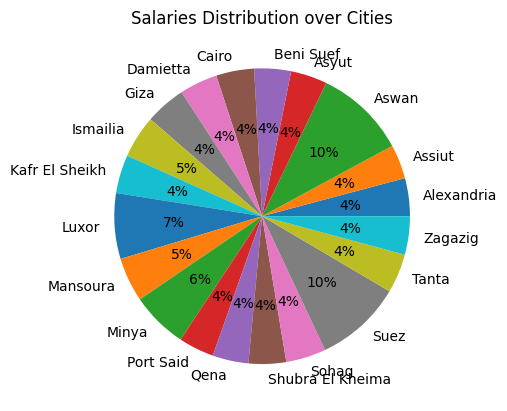

In [29]:
avg_salary_city = df.groupby('CITY')['SALARY'].mean()

plt.pie(avg_salary_city,
        labels = avg_salary_city.index,
        autopct='%1.0f%%'
        )
plt.title('Salaries Distribution over Cities')
plt.show()

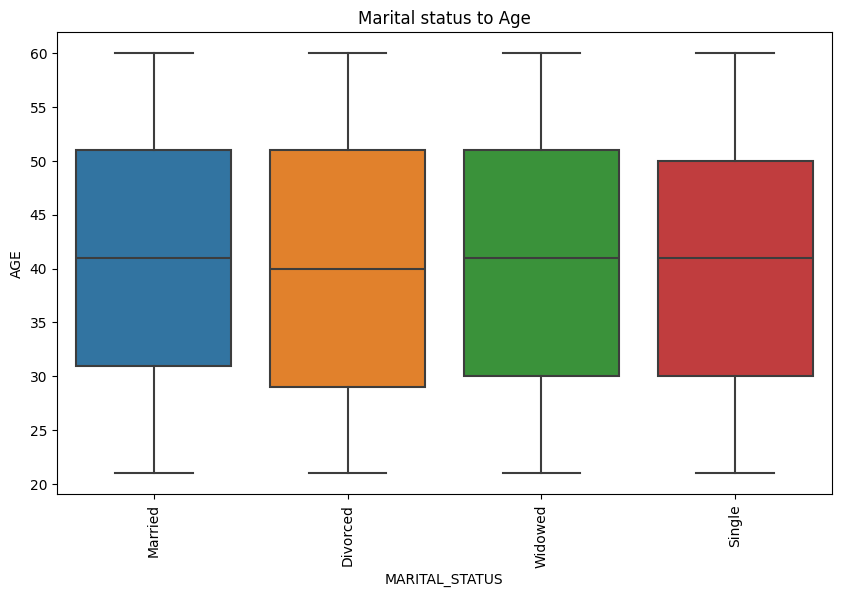

In [30]:
plt.figure(figsize=(10, 6)) 
import seaborn as sns

sns.boxplot(x='MARITAL_STATUS', y='AGE', data=df) #Bi varite

plt.xticks(rotation=90) 

plt.title('Marital status to Age') 
plt.show()

In [31]:
df.sample()

,NAME,CITY,SALARY,EDUCATION,AGE,MARITAL_STATUS,YEAR
2008,Amir Gamal,Shubra El Kheima,63247.0,Environmental Agriculture,27,Divorced,2022


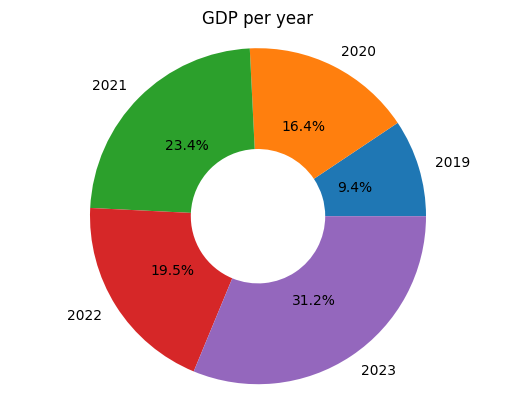

In [32]:
year_to_GDP = NewData.groupby('YEAR')['GDP'].mean()

plt.pie(year_to_GDP,
        labels=year_to_GDP.index,
        autopct='%1.1f%%', 
        wedgeprops=dict(width=0.6)
               ) 

plt.title('GDP per year') 
plt.axis('equal')
plt.show()

In [33]:
import plotly.express as px 

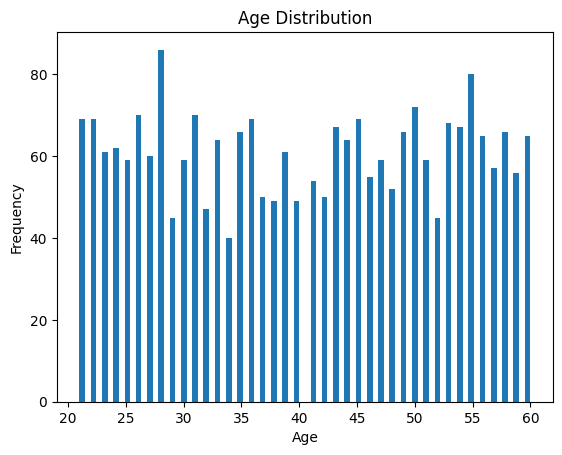

In [34]:
plt.hist(df['AGE'], bins=80) 

plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.title('Age Distribution') 
plt.show()

In [35]:
df['AGE'].mode()

0    28
Name: AGE, dtype: int64